In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from myst_nb import glue

## Prior and Posterior ##

You are used to thinking of coin tosses as a sequence of i.i.d. Bernoulli $(p)$ variables for some fixed $p$. In an earlier section we showed that the sample proportion of successes $\hat{p}$ is the MLE of the fixed but unknown $p$.

Instead, suppose we think of $p$ as the result of a random draw from a distribution on the unit interval. That is, we assume the probability that the coin lands heads is a random variable $X$ with some density $f_X$ on $(0, 1)$. This is called the *prior* density of $X$.

The prior density reflects our opinion about the unknown parameter before we see the data. For example, if we have no idea what the chance of heads might be, we could use the uniform (0, 1) prior for $X$. If for some reason we happen to think that the chance of heads is somewhere around 70%, we might use a beta (7, 3) prior because then the prior expectation of the chance of heads would be $E(X) = 7/(7+3) = 0.7$. Or we could use some other beta $(r, s)$ prior such that $r/(r+s)$ is around 0.7 and the shape of the prior density reflects our opinion about how the chance of heads is distributed around 70%.

Now suppose you pick a value $p$ of $X$ according to the prior density $f_X$, and repeatedly toss a coin that has chance $p$ of landing heads. Let $H$ be the number of heads. 

Then, given that $X = p$, the distribution of $H$ is binomial $(n, p)$.

Note the randomization: we are picking one value $p$ of $X$, and then tossing a $p$-coin $n$ times. We are not picking the coin afresh for each toss.

In [1]:
# VIDEO: Prior and Posterior Densities
from IPython.display import YouTubeVideo

vid_pri_post = YouTubeVideo('EXuoy618B-k')
glue("vid_pri_post", vid_pri_post)

```{dropdown} See More
:icon: video
{glue:}`vid_pri_post`
```

### Posterior Density ###

Suppose we observe $k$ heads. As you know, the *likelihood* of the data given a fixed value of the parameter can be written as

$$
Lik(p) ~ = ~  P(H = k \mid X = p) ~ = ~ {n \choose k} p^k (1-p)^{n-k}
$$

But the question of inference goes the other way around: given $H=k$, what is our opinion about $X$? 

The answer is expressed by the *posterior density of $X$ given* $H=k$. To find it, use Bayes' Rule:

$$
f_{X \vert H=k} (p)dp ~ \sim ~ \frac{P(X \in dp, H = k)}{P(H=k)}
~ \sim ~ \frac{f_X(p)dp \cdot P(H = k \mid X = p)}{P(H = k)}
$$

The denominator does not involve $p$. It is part of the constant that makes the posterior density integrate to 1. The posterior density is therefore *proportional* to the numerator:

$$
f_{X \vert H=k} (p) ~ \propto ~ f_X(p) \cdot P(H = k \mid X = p)
$$

As we saw in the discrete case earlier in the course, **the posterior is proportional to the prior times the likelihood**.

Sometimes, this observation is all that we need in order to identify the posterior distribution of $X$. Here is an example.

### Posterior Distribution Based on Uniform $(0, 1)$ Prior ###
Suppose we know nothing about the coin and therefore give $X$ the uniform $(0, 1)$ prior. Then given $H = k$, the posterior density of $X$ is given by

$$
f_{X \vert H=k} (p) ~ \propto ~ 1 \cdot p^k(1-p)^{n-k}
$$

The factor of ${n \choose k}$ doesn't involve $p$ and has been swept into the constant of proportionality.

Keep in mind that the possible values of $X$ are in the unit interval. Can you recognize what the posterior density of $X$ must be?

That's right: it's the beta $(k+1, n-k+1)$ density. The functional form is determined by $p^k(1-p)^{n-k}$, where $n$ and $k$ are known from the data and $p$ is the value of the variable. 

Let's see what we can say about this beta density. 

First note that the prior density, which is uniform on $(0, 1)$, is the beta $(1, 1)$ density. The posterior density is another beta, whose first parameter is obtained by adding the number of heads to the first parameter of the prior beta density. The second parameter is obtained by adding the number of tails to the second parameter of the prior beta density.

Next, given the data, what do we expect $X$ to be? That's $E(X \mid H = k)$, that is, the expectation of the beta $(k+1, n-k+1)$ posterior density of $X$ given the data $H=k$. By beta density facts, we get

$$
E(X \mid H=k) ~ = ~ \frac{k+1}{n+2}
$$

which for large $n$ is pretty close to the observed proportion $k/n$ but is not exactly the same.

### MAP Estimation: The Posterior Mode ###
The posterior distribution of $X$ reflects our new opinion about $X$ given the data. If we insist that our estimate of the chance of heads has to be a number rather than a distribution, we could go with the posterior mean that we found above. Or we could use the answer to a different question:

Given the data, what is $X$ most likely to be? More precisely, what is the mode of the posterior distribution of $X$ given the data $H=k$?

That's the mode of the beta $(k+1, n-k+1)$ density. This is called the *maximum a posteriori* (MAP) estimate of the chance of heads.

The mode of the beta $(r, s)$ density is straightforward to find by calculus. As you will show in an exercise, when $r$ and $s$ are both greater than $1$ the mode is $(r-1)/(r+s-2)$. 

So if $1 \le k \le n-1$ (that is, apart from the extreme cases $k = 0$ and $k = n$), the mode of the posterior distribution of $X$ given $H=k$ is 

$$
\frac{(k+1) - 1}{(n+2) - 2} ~ = ~ \frac{k}{n}
$$

which is the observed proportion of heads.

In the case $k = 0$, the posterior mode is 0, which is also the observed proportion of heads. In the case $k = n$, the posterior mode is 1, which again is the observed proportion of heads.

### MLE and MAP ###
We have just shown that if the chance of heads is chosen uniformly over the interval of possible values (0, 1), then the MAP estimate is the same as the MLE that we obtained assuming a fixed probability of heads.

Let's see why this makes sense. When the prior is uniform, the posterior density is given by

$$
f_{X \vert H=k} (p) ~ \propto ~ 1 \cdot p^k(1-p)^{n-k}
$$

The right hand side is just the likelihood of $k$ heads in $n$ tosses of a $p$-coin. Finding the mode of the posterior distribution is therefore equivalent to finding the $p$ that maximizes the likelihood. That's exactly what we did when we found the MLE of the chance of heads.

This equivalence relies on the fact that the uniform prior density is a constant. If we had used some other prior density on (0, 1), then the posterior mode might have been different from the proportion of heads. In the next chapter we will find the posterior density of $X$ starting with any beta prior. 

### The Posterior as a Prior for the Future ###

Suppose we make two tosses of a coin that lands heads with chance $X$ where $X$ is uniform on $(0, 1)$. 

We have seen that the chance that the first toss lands heads is $1/2$.

Now suppose the first toss *did* land heads. Given this information, what can we say about the coin? 

Our data are $k=1$ head in $n=1$ tosses, so by our earlier calculation, our updated opinion about the chance of heads $X$ is described by the posterior density which is beta $(1+1, 0+1)$, that is, beta $(2, 1)$. Its formula is $2p$ for $p$ in the interval $(0, 1)$. 

Notice that it puts more mass on the higher values of $p$, compared to the original uniform prior. Given that the first toss landed heads, our opinion has shifted away from uniform to a higher values of the chance of heads.

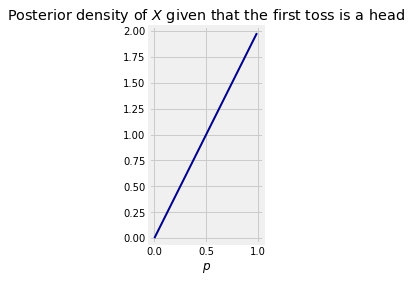

In [2]:
# NO CODE
plt.axes().set_aspect('equal')
p = np.arange(0, 1, 0.01)
plt.plot(p, 2*p, color='darkblue', lw=2)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 2.05)
plt.xlabel('$p$')
plt.title('Posterior density of $X$ given that the first toss is a head');

This density can now serve as our *prior density for the probability of heads on the second toss*, given that the first toss landed heads.

We can find $P(\text{second toss is a head} \mid \text{first toss is a head})$ using this posterior density. 

$$
\begin{align*}
P(\text{second toss is a head} \mid \text{first toss is a head}) 
~ &= ~ \int_0^1 p \cdot 2p \cdot dp \\
&= ~ \frac{2}{3}
\end{align*}
$$

This is the same answer that we got for this conditional probability in the previous section.